In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist_ds=keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist_ds.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

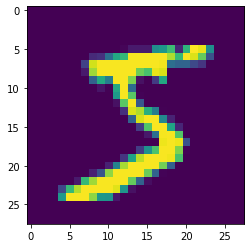

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

In [7]:
# Normalize
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [8]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(units='128',activation=tf.nn.relu),
                          tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9274
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1140 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0783 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0608 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0469 - accuracy: 0.9859


In [17]:
scores_test =model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

313/313 [==============================] - 0s 553us/step - loss: 0.0799 - accuracy: 0.9761

accuracy: 97.61%


In [12]:
y_pred=model.predict(x_test)

In [14]:
print('Predict prob: {}'.format( y_pred[0]))
import numpy as np
print('\nhighest prob from the list: {}'.format(np.argmax( y_pred[0])))
print('Test Label: {}'.format(y_test[0]))

Predict prob: [1.1186188e-09 4.0603812e-10 2.5626659e-06 1.5561421e-04 1.3289800e-10
 4.0985586e-08 1.1529332e-12 9.9984038e-01 3.2871705e-07 9.7305042e-07]

highest prob from the list: 7
Test Label: 7
